# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


In [5]:
cities

['kodiak',
 'okhotsk',
 'bodaybo',
 "nar'yan-mar",
 'sabang',
 'blackmans bay',
 'bonthe',
 'thompson',
 'klaksvik',
 'invercargill',
 'grytviken',
 'udachny',
 'mangai',
 'papatowai',
 'new norfolk',
 'longyearbyen',
 'bukama',
 'sisimiut',
 'sao jose da coroa grande',
 'petrove',
 'college',
 'north shore',
 'yellowknife',
 'lebu',
 'tura',
 'gonabad',
 'olonkinbyen',
 'utrik',
 'dakhla',
 'verdal',
 'waitangi',
 'road town',
 'ushuaia',
 'punta arenas',
 'acara',
 'bredasdorp',
 'hawaiian paradise park',
 'hede',
 'adamstown',
 'afaahiti',
 'loshnitsa',
 'uturoa',
 'cenes de la vega',
 'arraial do cabo',
 'sola',
 'bamboo flat',
 'susuman',
 'port-aux-francais',
 'albany',
 'chegdomyn',
 'saint-philippe',
 'puerto natales',
 'mejit',
 'kralendijk',
 'port mathurin',
 'pavlovskaya',
 'port glaud',
 'carauari',
 "ytyk-kyuyel'",
 'shalqar',
 'douentza',
 'gaspe',
 'badger',
 'qujing',
 'kapuskasing',
 'bera',
 'chavusy',
 'fale old settlement',
 'west island',
 'rongelap',
 'ancud',
 '

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
units = "metric"
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | okhotsk
Processing Record 3 of Set 1 | bodaybo
Processing Record 4 of Set 1 | nar'yan-mar
Processing Record 5 of Set 1 | sabang
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | bonthe
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | klaksvik
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | udachny
Processing Record 13 of Set 1 | mangai
Processing Record 14 of Set 1 | papatowai
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | bukama
Processing Record 18 of Set 1 | sisimiut
Processing Record 19 of Set 1 | sao jose da coroa grande
Processing Record 20 of Set 1 | petrove
Processing Record 21 of Set 1 | college
Processing Record 22 of Set 1 | north shore
Processing Record 23 o

Processing Record 37 of Set 4 | shingu
Processing Record 38 of Set 4 | ilulissat
Processing Record 39 of Set 4 | nemuro
Processing Record 40 of Set 4 | gazojak
Processing Record 41 of Set 4 | sarandi del yi
Processing Record 42 of Set 4 | akureyri
Processing Record 43 of Set 4 | corner brook
Processing Record 44 of Set 4 | fereydunshahr
Processing Record 45 of Set 4 | pailon
Processing Record 46 of Set 4 | sitka
Processing Record 47 of Set 4 | newman
Processing Record 48 of Set 4 | port alfred
Processing Record 49 of Set 4 | cuenca
Processing Record 0 of Set 5 | egilsstadir
Processing Record 1 of Set 5 | rockton
Processing Record 2 of Set 5 | bilibino
Processing Record 3 of Set 5 | khandud
Processing Record 4 of Set 5 | buchanan
Processing Record 5 of Set 5 | meadow lakes
Processing Record 6 of Set 5 | galesong
Processing Record 7 of Set 5 | vernon
Processing Record 8 of Set 5 | arkhangel'sk
Processing Record 9 of Set 5 | jamtara
Processing Record 10 of Set 5 | walvis bay
Processing Re

Processing Record 28 of Set 8 | qaryat suluq
Processing Record 29 of Set 8 | bahia de caraquez
Processing Record 30 of Set 8 | qianjiang
Processing Record 31 of Set 8 | nikolayevsk-on-amure
Processing Record 32 of Set 8 | angra do heroismo
Processing Record 33 of Set 8 | kirakira
Processing Record 34 of Set 8 | fortuna
Processing Record 35 of Set 8 | solnechnyy
Processing Record 36 of Set 8 | rosa zarate
Processing Record 37 of Set 8 | niquero
Processing Record 38 of Set 8 | yekaterinovka
Processing Record 39 of Set 8 | kayenta
Processing Record 40 of Set 8 | yauya
Processing Record 41 of Set 8 | condado
Processing Record 42 of Set 8 | ciudad lazaro cardenas
Processing Record 43 of Set 8 | zouerate
Processing Record 44 of Set 8 | tobelo
Processing Record 45 of Set 8 | laojunmiao
Processing Record 46 of Set 8 | south hedland
Processing Record 47 of Set 8 | copiapo
Processing Record 48 of Set 8 | klyuchi
Processing Record 49 of Set 8 | tilcara
Processing Record 0 of Set 9 | champerico
Pr

Processing Record 18 of Set 12 | ronne
Processing Record 19 of Set 12 | inari
Processing Record 20 of Set 12 | williston
Processing Record 21 of Set 12 | saint-francois
Processing Record 22 of Set 12 | colesberg
Processing Record 23 of Set 12 | vadso
Processing Record 24 of Set 12 | shushi
Processing Record 25 of Set 12 | mao
Processing Record 26 of Set 12 | weihai
Processing Record 27 of Set 12 | parkes
Processing Record 28 of Set 12 | urangan
Processing Record 29 of Set 12 | mancio lima
Processing Record 30 of Set 12 | kardla
Processing Record 31 of Set 12 | tranovaho
City not found. Skipping...
Processing Record 32 of Set 12 | rockport
Processing Record 33 of Set 12 | maturin
Processing Record 34 of Set 12 | haiku-pauwela
Processing Record 35 of Set 12 | sechura
Processing Record 36 of Set 12 | mili
Processing Record 37 of Set 12 | malvan
Processing Record 38 of Set 12 | porbandar
Processing Record 39 of Set 12 | zavetnoye
Processing Record 40 of Set 12 | chambas
Processing Record 4

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,5.73,93,100,5.14,US,1683679211
1,okhotsk,59.3833,143.3000,5.83,71,7,1.47,RU,1683679211
2,bodaybo,57.8506,114.1933,10.38,79,77,0.84,RU,1683679211
3,nar'yan-mar,67.6713,53.0870,-2.10,90,98,4.89,RU,1683679211
4,sabang,5.8933,95.3214,28.59,69,100,5.61,ID,1683679212


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("./output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("./output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,montbrison,45.6667,4.0833,12.19,85,99,1.00,FR,1683612655
1,carutapera,-1.1950,-46.0200,24.48,92,50,1.40,BR,1683612655
2,tiksi,71.6872,128.8694,-4.43,70,88,8.85,RU,1683612186
3,islamkot,24.6997,70.1770,38.36,16,0,5.25,PK,1683612656
4,puerto natales,-51.7236,-72.4875,3.43,84,13,2.05,CL,1683612181


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

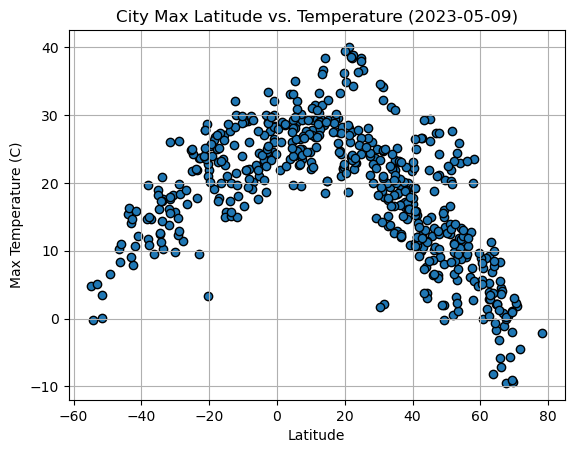

In [19]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o",edgecolor='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-05-09)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("./output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

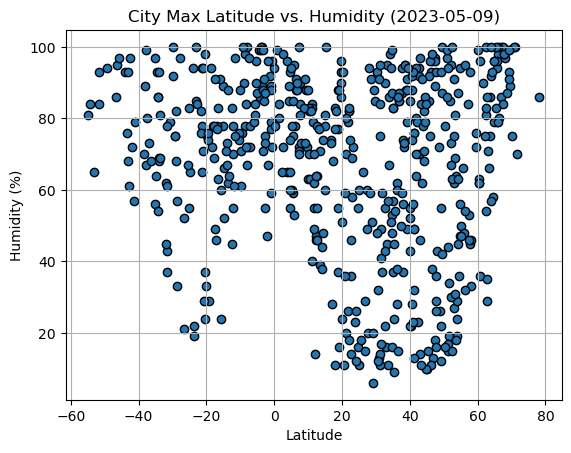

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o",edgecolor='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2023-05-09)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("./output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

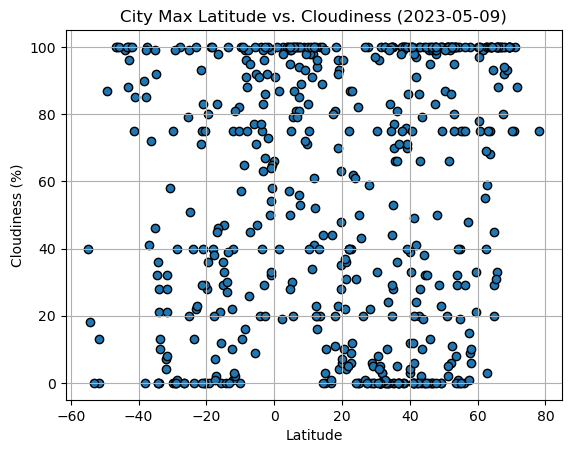

In [23]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o",edgecolor='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2023-05-09)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("./output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

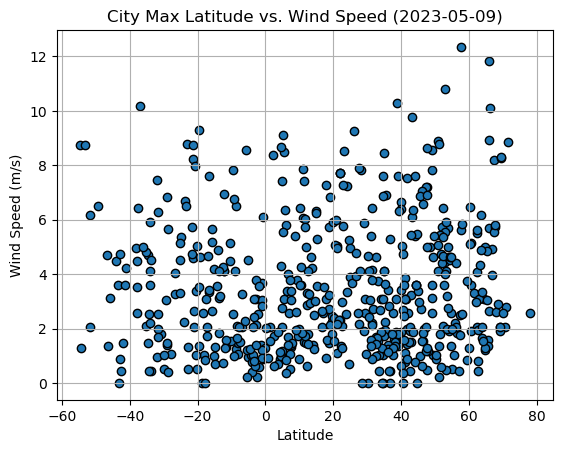

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o",edgecolor='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2023-05-09)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("./output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [44]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.12x +21.0


In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
filtr_north = city_data_df['Lat']>=0
northern_hemi_df = city_data_df[filtr_north]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,montbrison,45.6667,4.0833,12.19,85,99,1.00,FR,1683612655
2,tiksi,71.6872,128.8694,-4.43,70,88,8.85,RU,1683612186
3,islamkot,24.6997,70.1770,38.36,16,0,5.25,PK,1683612656
6,kirensk,57.7853,108.1119,20.05,45,9,5.61,RU,1683612656
7,alavus,62.5833,23.6167,9.21,54,100,4.09,FI,1683612656


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
filtr_south = city_data_df['Lat']<0
southern_hemi_df = city_data_df[filtr_south]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,carutapera,-1.1950,-46.0200,24.48,92,50,1.40,BR,1683612655
4,puerto natales,-51.7236,-72.4875,3.43,84,13,2.05,CL,1683612181
5,port lincoln,-34.7333,135.8667,16.19,64,92,4.70,AU,1683612263
11,port-aux-francais,-49.3500,70.2167,6.63,94,87,6.51,TF,1683612188
12,waitangi,-43.9535,-176.5597,15.46,93,99,4.47,NZ,1683612185


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6446956332926994


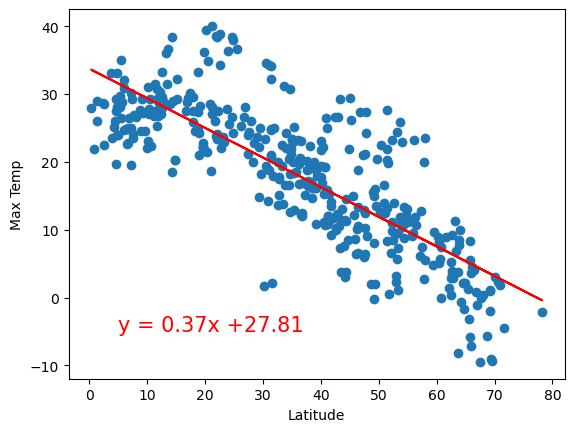

In [63]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(5,-5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.564714939108854


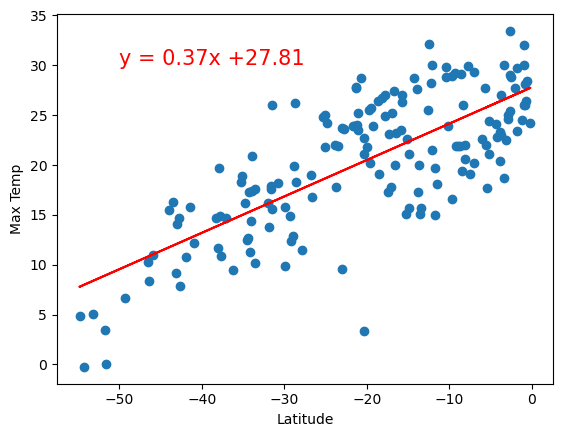

In [65]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** We see a linear relationship between the dependant (Max Temp) and the independant variable (Latitude). In this case we can see that the closer to the Ecuador the tmeperature tends to increase

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.002195080522545154


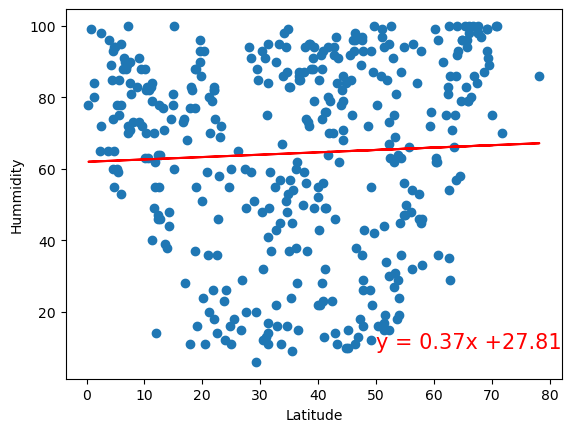

In [68]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Hummidity')
plt.annotate(line_eq,(50,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.005799320904223842


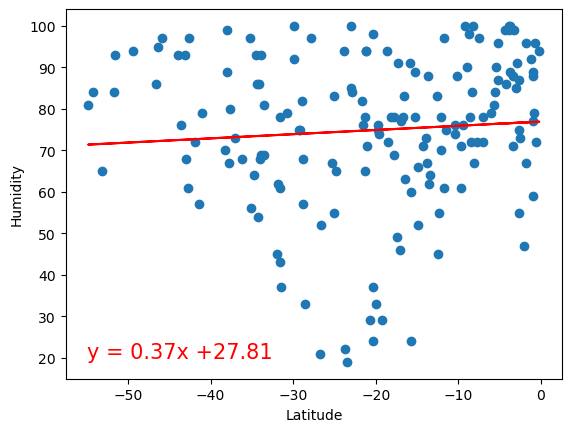

In [77]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** We see a clear NON linear relationship between the dependant (Humidity) and the independant variable (Latitude) Thus we cannont interpretate meaningfully a correlation between the two varibles

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.00348566261698662


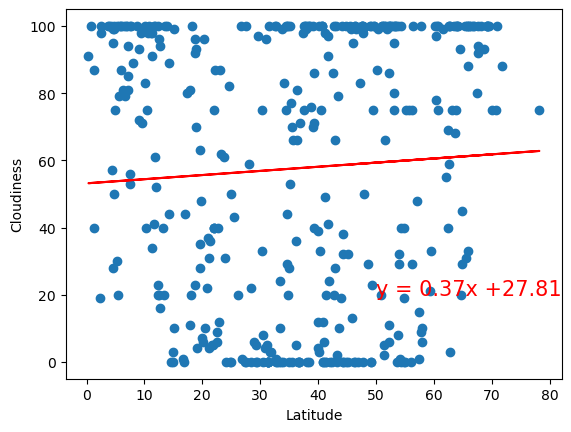

In [81]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(50,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.0076532083043005525


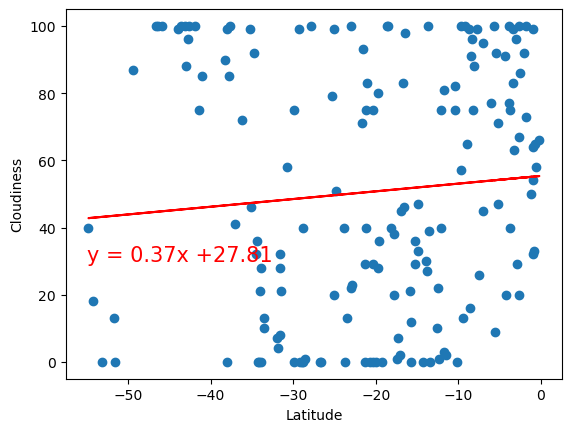

In [83]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** We see a clear NON linear relationship between the dependant (Cloudiness) and the independant variable (Latitude) Thus we cannont interpretate meaningfully a correlation between the two varibles

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.008677492659344269


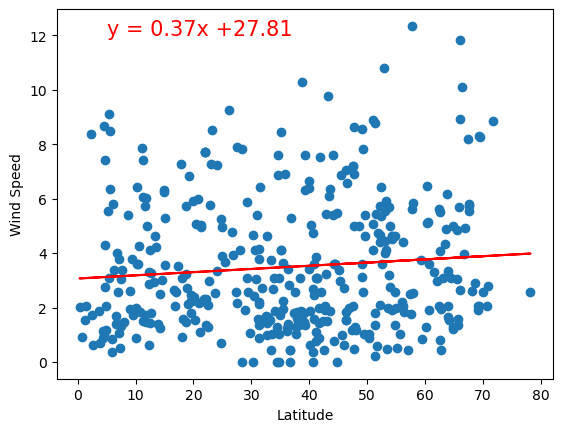

In [86]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(5,12),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.0540028213712354


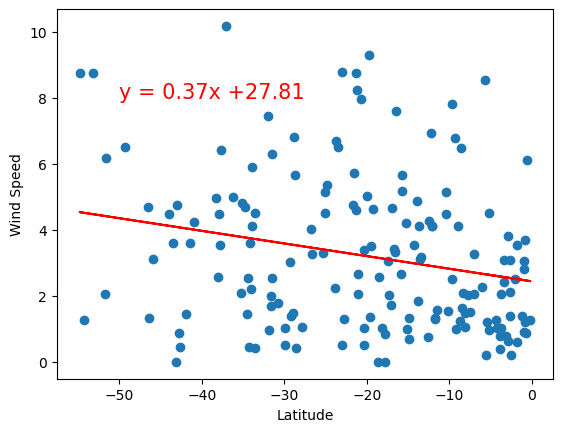

In [88]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-50,8),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** We see a clear NON linear relationship between the dependant (Wind Speed) and the independant variable (Latitude) Thus we cannont interpretate meaningfully a correlation between the two varibles